<a href="https://colab.research.google.com/github/vidhikapoor20/PCA-Image-Classification/blob/master/sm2_stonepaperscissors_pcaimages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train = "/content/drive/My Drive/SM-2_PCAImagesSPS/Train-spsimages"

In [3]:
test = "/content/drive/My Drive/SM-2_PCAImagesSPS/Test-spsimages"

In [4]:
import cv2
import os

folder= "/content/drive/My Drive/SM-2_PCAImagesSPS/Train-spsimages"

trainimages = []
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
       gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       resize_img = cv2.resize(gray_image  , (64 , 64))
       trainimages.append(resize_img)


In [5]:
print(trainimages)

[array([[145,  77,  58, ..., 228, 229, 232],
       [ 81,  71,  67, ..., 229, 231, 230],
       [ 76,  74,  73, ..., 229, 229, 230],
       ...,
       [189, 191, 196, ...,  77,  82,  76],
       [189, 186, 184, ...,  72,  69,  74],
       [185, 190, 190, ...,  70,  57,  66]], dtype=uint8), array([[112,  82,  91, ..., 217, 219, 220],
       [120,  97,  91, ..., 217, 218, 221],
       [155, 121,  78, ..., 212, 217, 216],
       ...,
       [185, 185, 190, ...,  72,  87,  78],
       [184, 181, 187, ...,  72,  83,  69],
       [181, 180, 186, ...,  77,  67,  79]], dtype=uint8), array([[128, 137, 139, ..., 233, 237, 235],
       [130, 141, 132, ..., 231, 230, 232],
       [104, 129, 130, ..., 231, 232, 234],
       ...,
       [178, 182, 180, ...,  94,  90,  90],
       [176, 182, 179, ...,  81,  79,  95],
       [179, 186, 185, ...,  69,  69,  84]], dtype=uint8), array([[102, 113,  97, ..., 231, 227, 236],
       [104,  97, 127, ..., 226, 226, 235],
       [101,  91, 102, ..., 225, 226, 

In [6]:
import numpy as np
trainimages=np.array(trainimages)

In [7]:
trainimages.shape

(27, 64, 64)

In [8]:
folder= "/content/drive/My Drive/SM-2_PCAImagesSPS/Test-spsimages"

testimages = []
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
       gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       resize_img = cv2.resize(gray_image  , (64 , 64))
       testimages.append(resize_img)

In [9]:
print(testimages)

[array([[ 78,  71,  81, ..., 210, 208, 208],
       [ 87,  71,  75, ..., 202, 206, 204],
       [ 70,  63,  43, ..., 206, 205, 210],
       ...,
       [190, 193, 192, ...,  84,  70,  71],
       [189, 194, 194, ...,  87,  74,  73],
       [197, 194, 200, ...,  96, 104, 110]], dtype=uint8), array([[201, 215, 233, ..., 192, 195, 201],
       [163, 180, 191, ..., 188, 209, 217],
       [172, 161, 188, ..., 203, 208, 217],
       ...,
       [173, 173, 178, ...,  43, 105,  49],
       [168, 172, 180, ...,  18,  27,  70],
       [170, 171, 176, ...,  49,  27,  30]], dtype=uint8), array([[ 96,  91,  88, ..., 138,  75,  60],
       [109,  95,  93, ...,  79,  74,  86],
       [ 99, 103,  94, ...,  92,  61,  76],
       ...,
       [204, 204, 208, ...,  32,  31,  43],
       [201, 201, 196, ...,  45,  25,  43],
       [186, 188, 187, ..., 218, 214, 198]], dtype=uint8)]


In [10]:
testimages = np.array(testimages)

In [11]:
testimages.shape

(3, 64, 64)

In [12]:
k=trainimages[1]

In [13]:
k.shape

(64, 64)

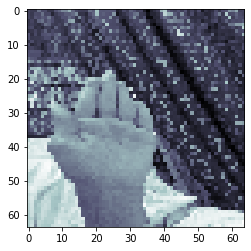

In [14]:
from matplotlib import pyplot as plt
plt.imshow(trainimages[20],cmap=plt.cm.bone)

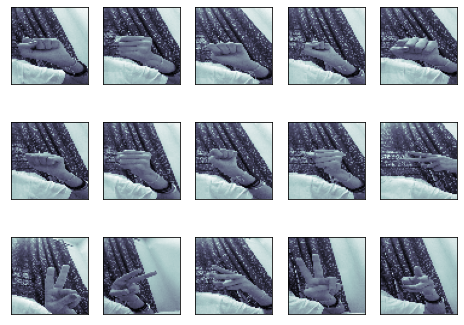

In [15]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(trainimages[i], cmap=plt.cm.bone)

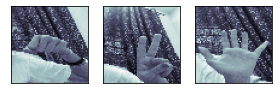

In [16]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(3):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(testimages[i], cmap=plt.cm.bone)

In [17]:
y_train = [0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1]

In [18]:
y_test = [0,2,1]

In [19]:
y_train = np.array(y_train)

In [20]:
y_test = np.array(y_test)

In [21]:
print(y_train.shape)
print(y_test.shape)

(27,)
(3,)


In [22]:
print(trainimages.shape)
print(testimages.shape)

(27, 64, 64)
(3, 64, 64)


In [23]:
trainimages = trainimages.reshape((27,64*64))
testimages = testimages.reshape((3,64*64))
trainimages=trainimages.astype('float')/255
testimages=testimages.astype('float')/255

In [24]:
from sklearn.decomposition import PCA
pca1 = PCA(18) 
pca1.fit(trainimages)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
print(pca1.components_.shape) ##V

(18, 4096)


In [26]:
print(pca1.explained_variance_)  ##Eigen values

[45.52786615 20.06769795  8.71097159  7.1918726   6.68297147  6.27758089
  4.98162293  4.60381683  4.45917144  3.88503215  3.78654378  3.52387486
  3.28312286  3.10747448  2.96401288  2.83275826  2.77561558  2.73670304]


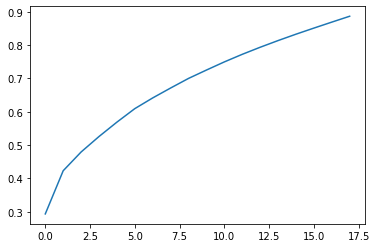

In [27]:
import numpy as np
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

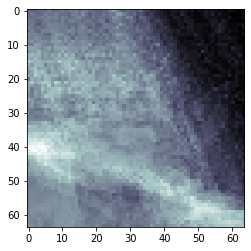

In [28]:
plt.imshow(pca1.components_[0].reshape(64,64),cmap=plt.cm.bone)

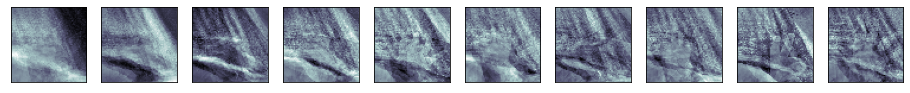

In [29]:
##Plotting first 10 eigen faces 
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(64,64),
              cmap=plt.cm.bone)

In [30]:
x_train_pca = pca1.fit_transform(trainimages)  ##omega
 
print(x_train_pca.shape) 

(27, 18)


In [31]:
x_test_pca = pca1.transform(testimages)
print(x_test_pca.shape)

(3, 18)


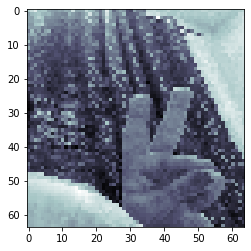

In [32]:
inv_proj3 = pca1.inverse_transform(x_train_pca)
plt.imshow(inv_proj3[10].reshape(64,64),cmap=plt.cm.bone)

In [33]:
from keras import models
from keras import layers

In [34]:
nn=models.Sequential()
nn.add(layers.Dense(612, activation="relu", input_shape=(18,)))
nn.add(layers.Dense(356,activation='tanh'))
nn.add(layers.Dense(148,activation='sigmoid'))
nn.add(layers.Dense(72,activation='tanh'))
nn.add(layers.Dense(32,activation='relu'))
nn.add(layers.Dense(3,activation='softmax'))

In [35]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 612)               11628     
_________________________________________________________________
dense_1 (Dense)              (None, 356)               218228    
_________________________________________________________________
dense_2 (Dense)              (None, 148)               52836     
_________________________________________________________________
dense_3 (Dense)              (None, 72)                10728     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2336      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 295,855
Trainable params: 295,855
Non-trainable params: 0
__________________________________________________

In [36]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [37]:
print(y_train.shape)
print(y_test.shape)

(27, 3)
(3, 3)


In [38]:
nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
nn.fit(x_train_pca, y_train, epochs=10, batch_size=128)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 1.1558 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 0.8784 - accuracy: 0.4074
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.8519
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8889
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.2427 - accuracy: 0.9630
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 1.0000


In [40]:
test_loss, test_acc=nn.evaluate(x_test_pca, y_test)
print(test_loss, test_acc)

1/1 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 1.0000
0.05465647578239441 1.0
